In [19]:
import glob

import pandas as pd
import numpy as np
import scanpy as sc
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pathlib
import celltypist
from celltypist import models
params = {
    'font.size': 12,
    'axes.titlesize': 12,
    'axes.labelsize': 12,
    'legend.fontsize': 12,
    'xtick.labelsize': 8,
    'ytick.labelsize': 10,
    'font.family': "Arial",
    'pdf.fonttype': 42,
    'ps.fonttype': 42,
    'figure.dpi': 100
   }
tissue = "LN"
mpl.rcParams.update(params)
sns.set_style("ticks")
sns.set_context(context='paper')
savefig_args = {"dpi": 300, "bbox_inches": "tight", "pad_inches": 0, "transparent": True}
mpl.rc('savefig', dpi=300)
output_dir='figures/QCandAnnotation/{}'.format(tissue)
pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)
output_suffix = ""
output_formats = [".png", ".svg"]
sc.settings.figdir = output_dir
sc.set_figure_params(format='pdf', transparent=True,)
def save_figure(fig, name, output_dir=output_dir, output_suffix=output_suffix, output_formats=output_formats, savefig_args=savefig_args):
    for output_format in output_formats:
        fig.savefig(output_dir + "/" + name + output_suffix + output_format, **savefig_args)
    return None

pd.set_option('display.max_rows', 50)
pd.set_option('display.max_columns', 20) 
pd.set_option('display.width', 100)
%load_ext autoreload
%autoreload 2

In [20]:
%run ../_helper.py

In [21]:
adata = sc.read_h5ad("outputs/tissue_objs/{}_processed.h5ad".format(tissue))

... storing 'rare_or_bad_q_cell' as categorical


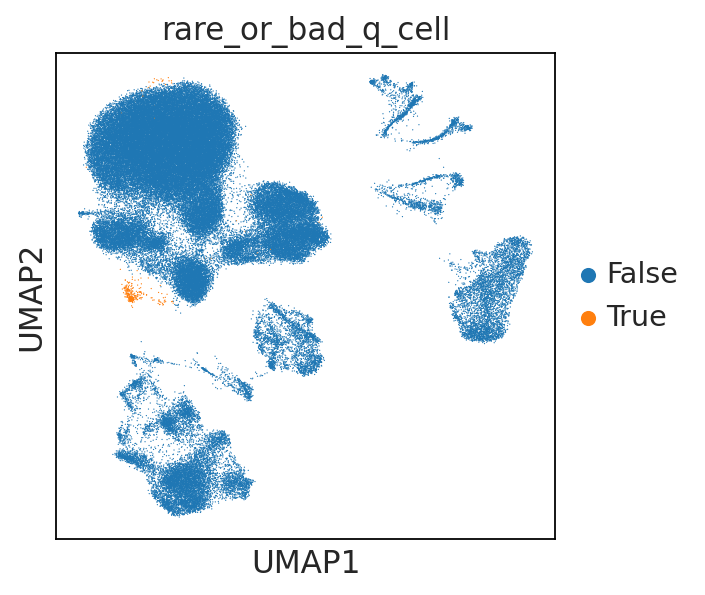

In [26]:
label = "probable_hq_single_b_cell"
label = "possible_b_cell"
label = "rare_or_bad_q_cell"

adata.obs[label] = adata.obs[label].astype(str)

sc.pl.umap(adata, color = label)

In [23]:
adata.obs.probable_hq_single_not_b_cell

AAACCTGAGAAGAAGC-1      False
AAACCTGAGACCCACC-1-1    False
AAACCTGAGCCACCTG-1-1    False
AAACCTGAGCCCGAAA-1      False
AAACCTGAGCGGCTTC-1-1    False
                        ...  
TTTGTCATCGCAGGCT-1      False
TTTGTCATCGTTACGA-1       True
TTTGTCATCTCCAACC-1       True
TTTGTCATCTGGCGAC-1      False
TTTGTCATCTTTAGGG-1-1     True
Name: probable_hq_single_not_b_cell, Length: 94747, dtype: bool

... storing 'probable_hq_single_not_b_cell' as categorical


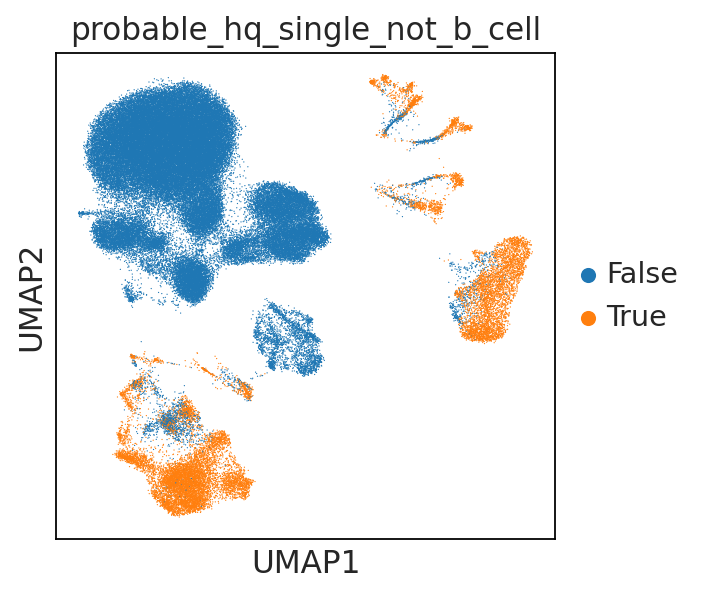

In [24]:
label = "probable_hq_single_not_b_cell"
adata.obs[label] = adata.obs[label].astype(str)
sc.pl.umap(adata, color = label)

In [7]:
adata.obs['predicted_doublets_umi_counts'] == True

AAACCTGAGCCAACAG-1      False
AAACCTGAGGACAGCT-1-1    False
AAACCTGAGTCAAGCG-1      False
AAACCTGAGTGACATA-1      False
AAACCTGCACCGAAAG-1      False
                        ...  
TTTGTCATCTCCAACC-1-1    False
TTTGTCATCTCCCTGA-1-2    False
TTTGTCATCTCTGCTG-1-1    False
TTTGTCATCTGTTGAG-1-1    False
TTTGTCATCTTTACGT-1      False
Name: predicted_doublets_umi_counts, Length: 68935, dtype: bool

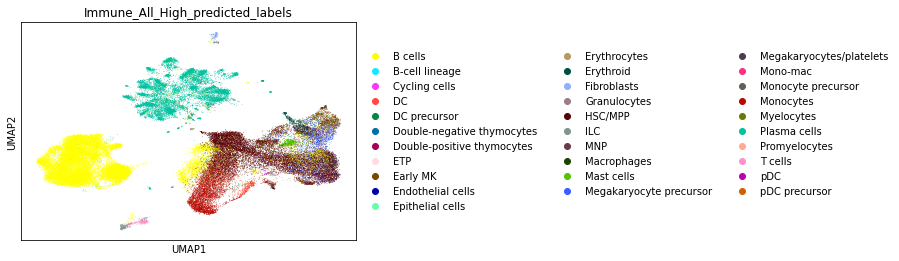

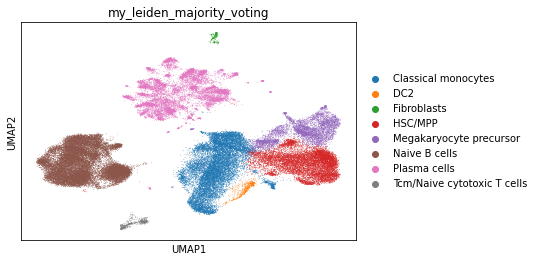

TypeError: The numpy boolean negative, the `-` operator, is not supported, use the `~` operator or the logical_not function instead.

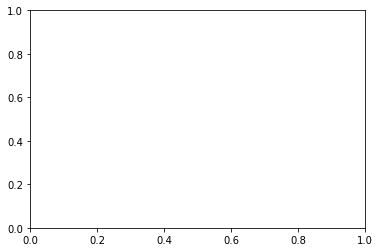

In [3]:
sc.pl.umap(adata, color = 'Immune_All_High_predicted_labels')
sc.pl.umap(adata, color = 'my_leiden_majority_voting')
sc.pl.umap(adata, color = 'predicted_doublets_umi_counts')
sc.pl.umap(adata, color = 'my_leiden_majority_voting')

In [162]:
## Algo for definitely being a B cell
adata.obs["b_cell_super_cluster"] = adata.obs['my_leiden_majority_voting'].str.contains("B cells|Plasma")

# change categorical to boolian
bool_mapper = {"True":True, "False":False}
adata.obs.predicted_doublets_umi_counts = adata.obs.predicted_doublets_umi_counts.astype(str).map(bool_mapper)

In [170]:
adata.obs.b_cell_super_cluster

AAACCTGAGCCAACAG-1       True
AAACCTGAGGACAGCT-1-1    False
AAACCTGAGTCAAGCG-1       True
AAACCTGAGTGACATA-1      False
AAACCTGCACCGAAAG-1       True
                        ...  
TTTGTCATCTCCAACC-1-1     True
TTTGTCATCTCCCTGA-1-2     True
TTTGTCATCTCTGCTG-1-1     True
TTTGTCATCTGTTGAG-1-1    False
TTTGTCATCTTTACGT-1       True
Name: b_cell_super_cluster, Length: 68935, dtype: bool

In [169]:
adata.obs.predicted_doublets_umi_counts

AAACCTGAGCCAACAG-1      False
AAACCTGAGGACAGCT-1-1    False
AAACCTGAGTCAAGCG-1      False
AAACCTGAGTGACATA-1      False
AAACCTGCACCGAAAG-1      False
                        ...  
TTTGTCATCTCCAACC-1-1    False
TTTGTCATCTCCCTGA-1-2    False
TTTGTCATCTCTGCTG-1-1    False
TTTGTCATCTGTTGAG-1-1    False
TTTGTCATCTTTACGT-1      False
Name: predicted_doublets_umi_counts, Length: 68935, dtype: bool

In [181]:
adata.obs['probable_hq_single_b_cell'] = (adata.obs["b_cell_super_cluster"] & 
                                          ~adata.obs['predicted_doublets_umi_counts'] & 
                                          (~adata.obs.BM_leiden.astype(int) < 16))

adata.obs["possible_b_cell"] = adata.obs["Immune_All_Low_predicted_labels"].str.contains("B cell|Plasma")

adata.obs["probable_hq_single_not_b_cell"] = (~adata.obs["b_cell_super_cluster"] & 
                                              ~adata.obs['predicted_doublets_umi_counts']  
                                              & (~adata.obs.BM_leiden.astype(int) < 16))

adata.obs["rare_or_bad_q_cell"] = adata.obs['BM_leiden'].astype(int) > 16

In [ ]:
adata.obs['leiden_doublet'] = adata.obs['leiden'].astype(str) + "_" + adata.obs['predicted_doublets_umi_counts'].astype(str)

In [50]:
filter_low_abundance_cell_groups = False
cell_group = "leiden_doublet"
if filter_low_abundance_cell_groups:
    select = adata.obs[cell_group].value_counts() > (adata.obs.shape[0] / 1000)
    adata = adata[adata.obs[cell_group].isin(select[select == True].index)]


/home/michaelswift/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/home/michaelswift/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/home/michaelswift/miniconda3/envs/scvi-env/lib/python3.9/site-packages/scanpy/tools/_rank_gene

majority Naive B cells


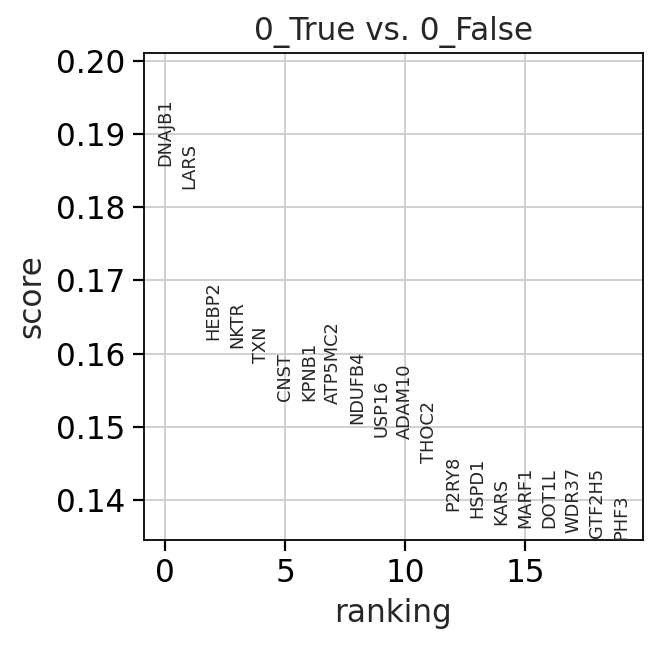

majority Classical monocytes


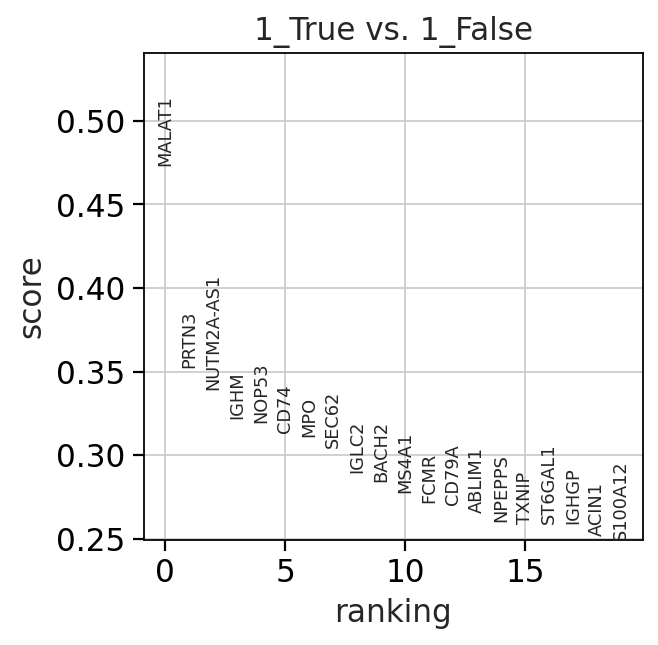

majority HSC/MPP


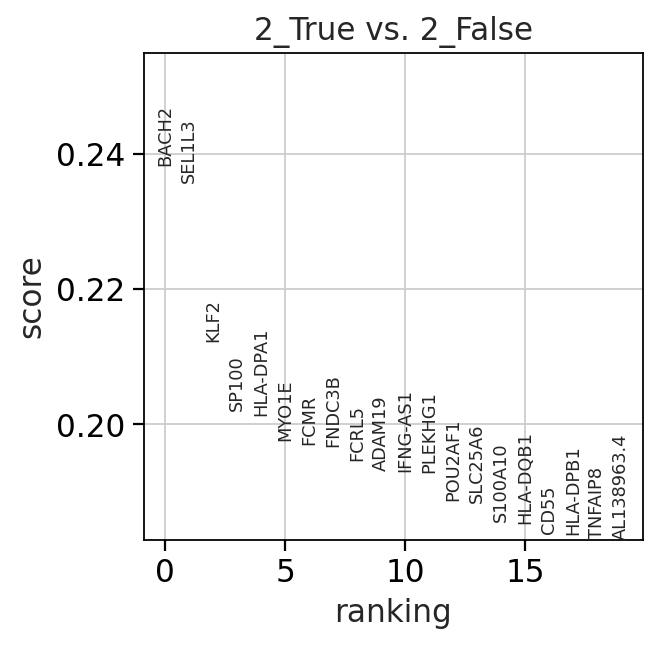

majority Megakaryocyte precursor


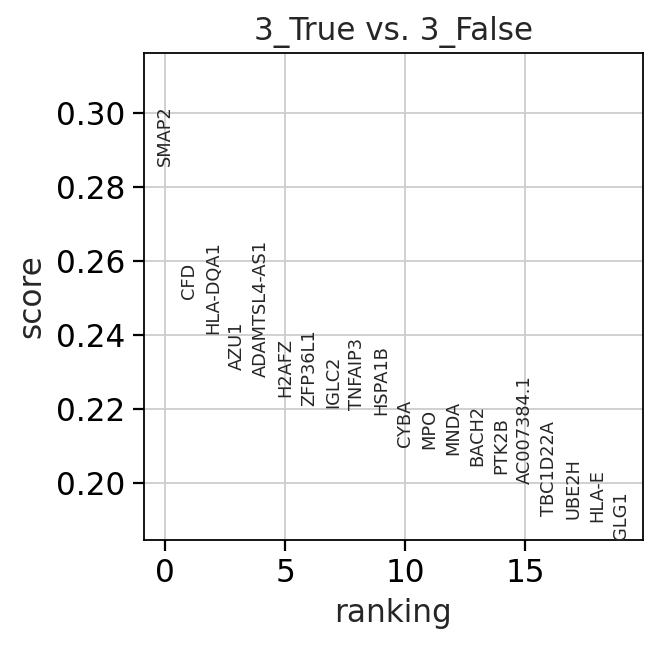

majority Plasma cells


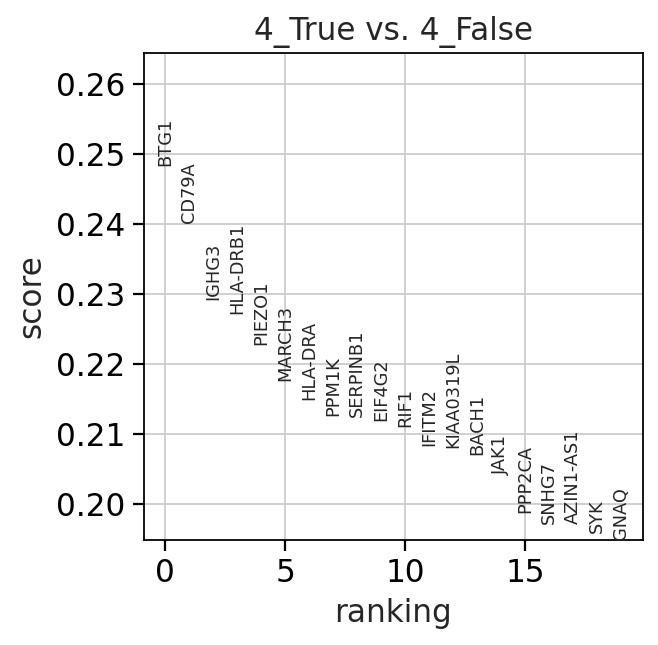

majority Plasma cells


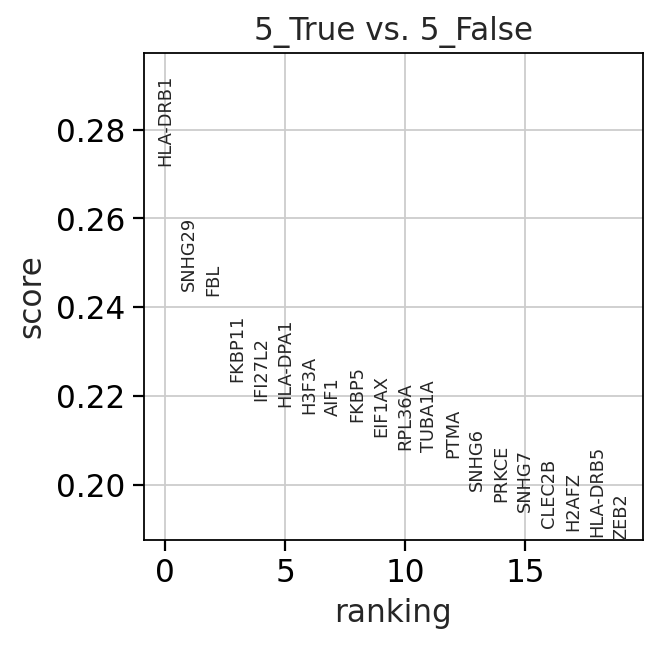

majority Naive B cells


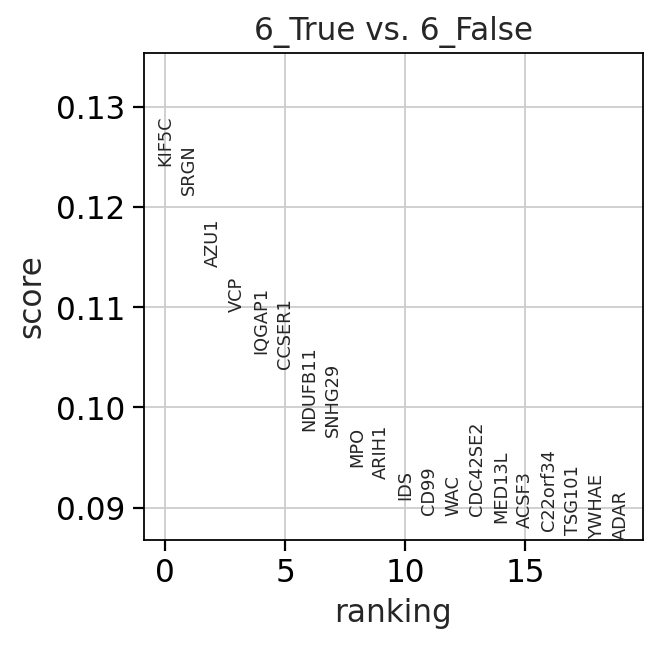

majority Tcm/Naive cytotoxic T cells


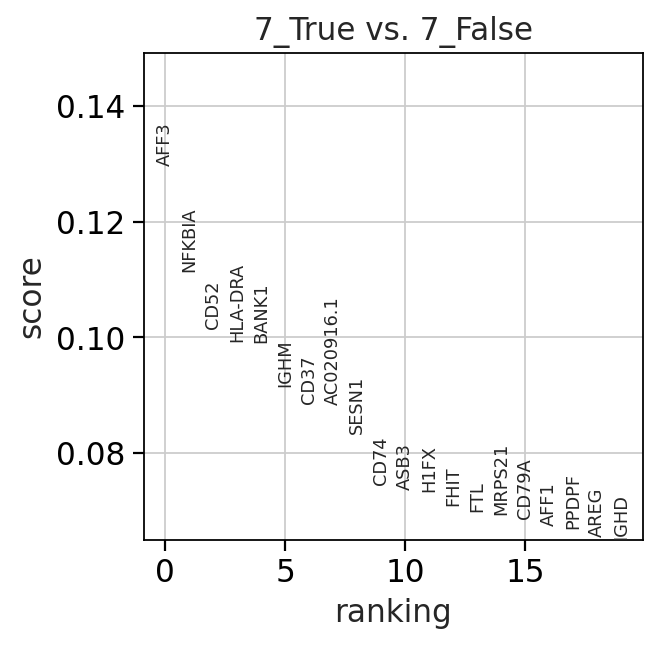

majority Plasma cells


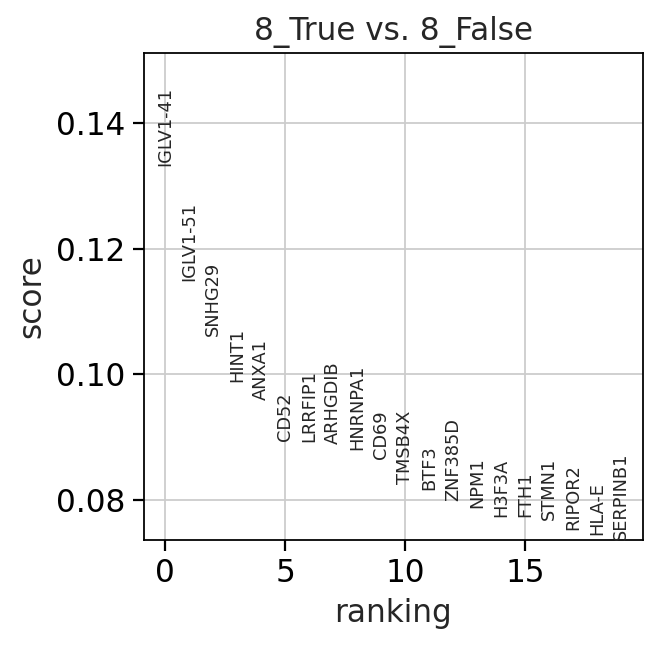

majority DC2


IndexError: index 0 is out of bounds for axis 0 with size 0

In [83]:
for i, df in adata.obs.groupby('leiden'):
    try:
        print("majority", df.High_Res_predicted_labels.value_counts().idxmax())
        sc.tl.rank_genes_groups(adata, groupby=cell_group, groups=["{}_True".format(i)], reference="{}_False".format(i), method='logreg')
        sc.pl.rank_genes_groups(adata)
    except ValueError:
        print("There's not enough cells for that comparison")

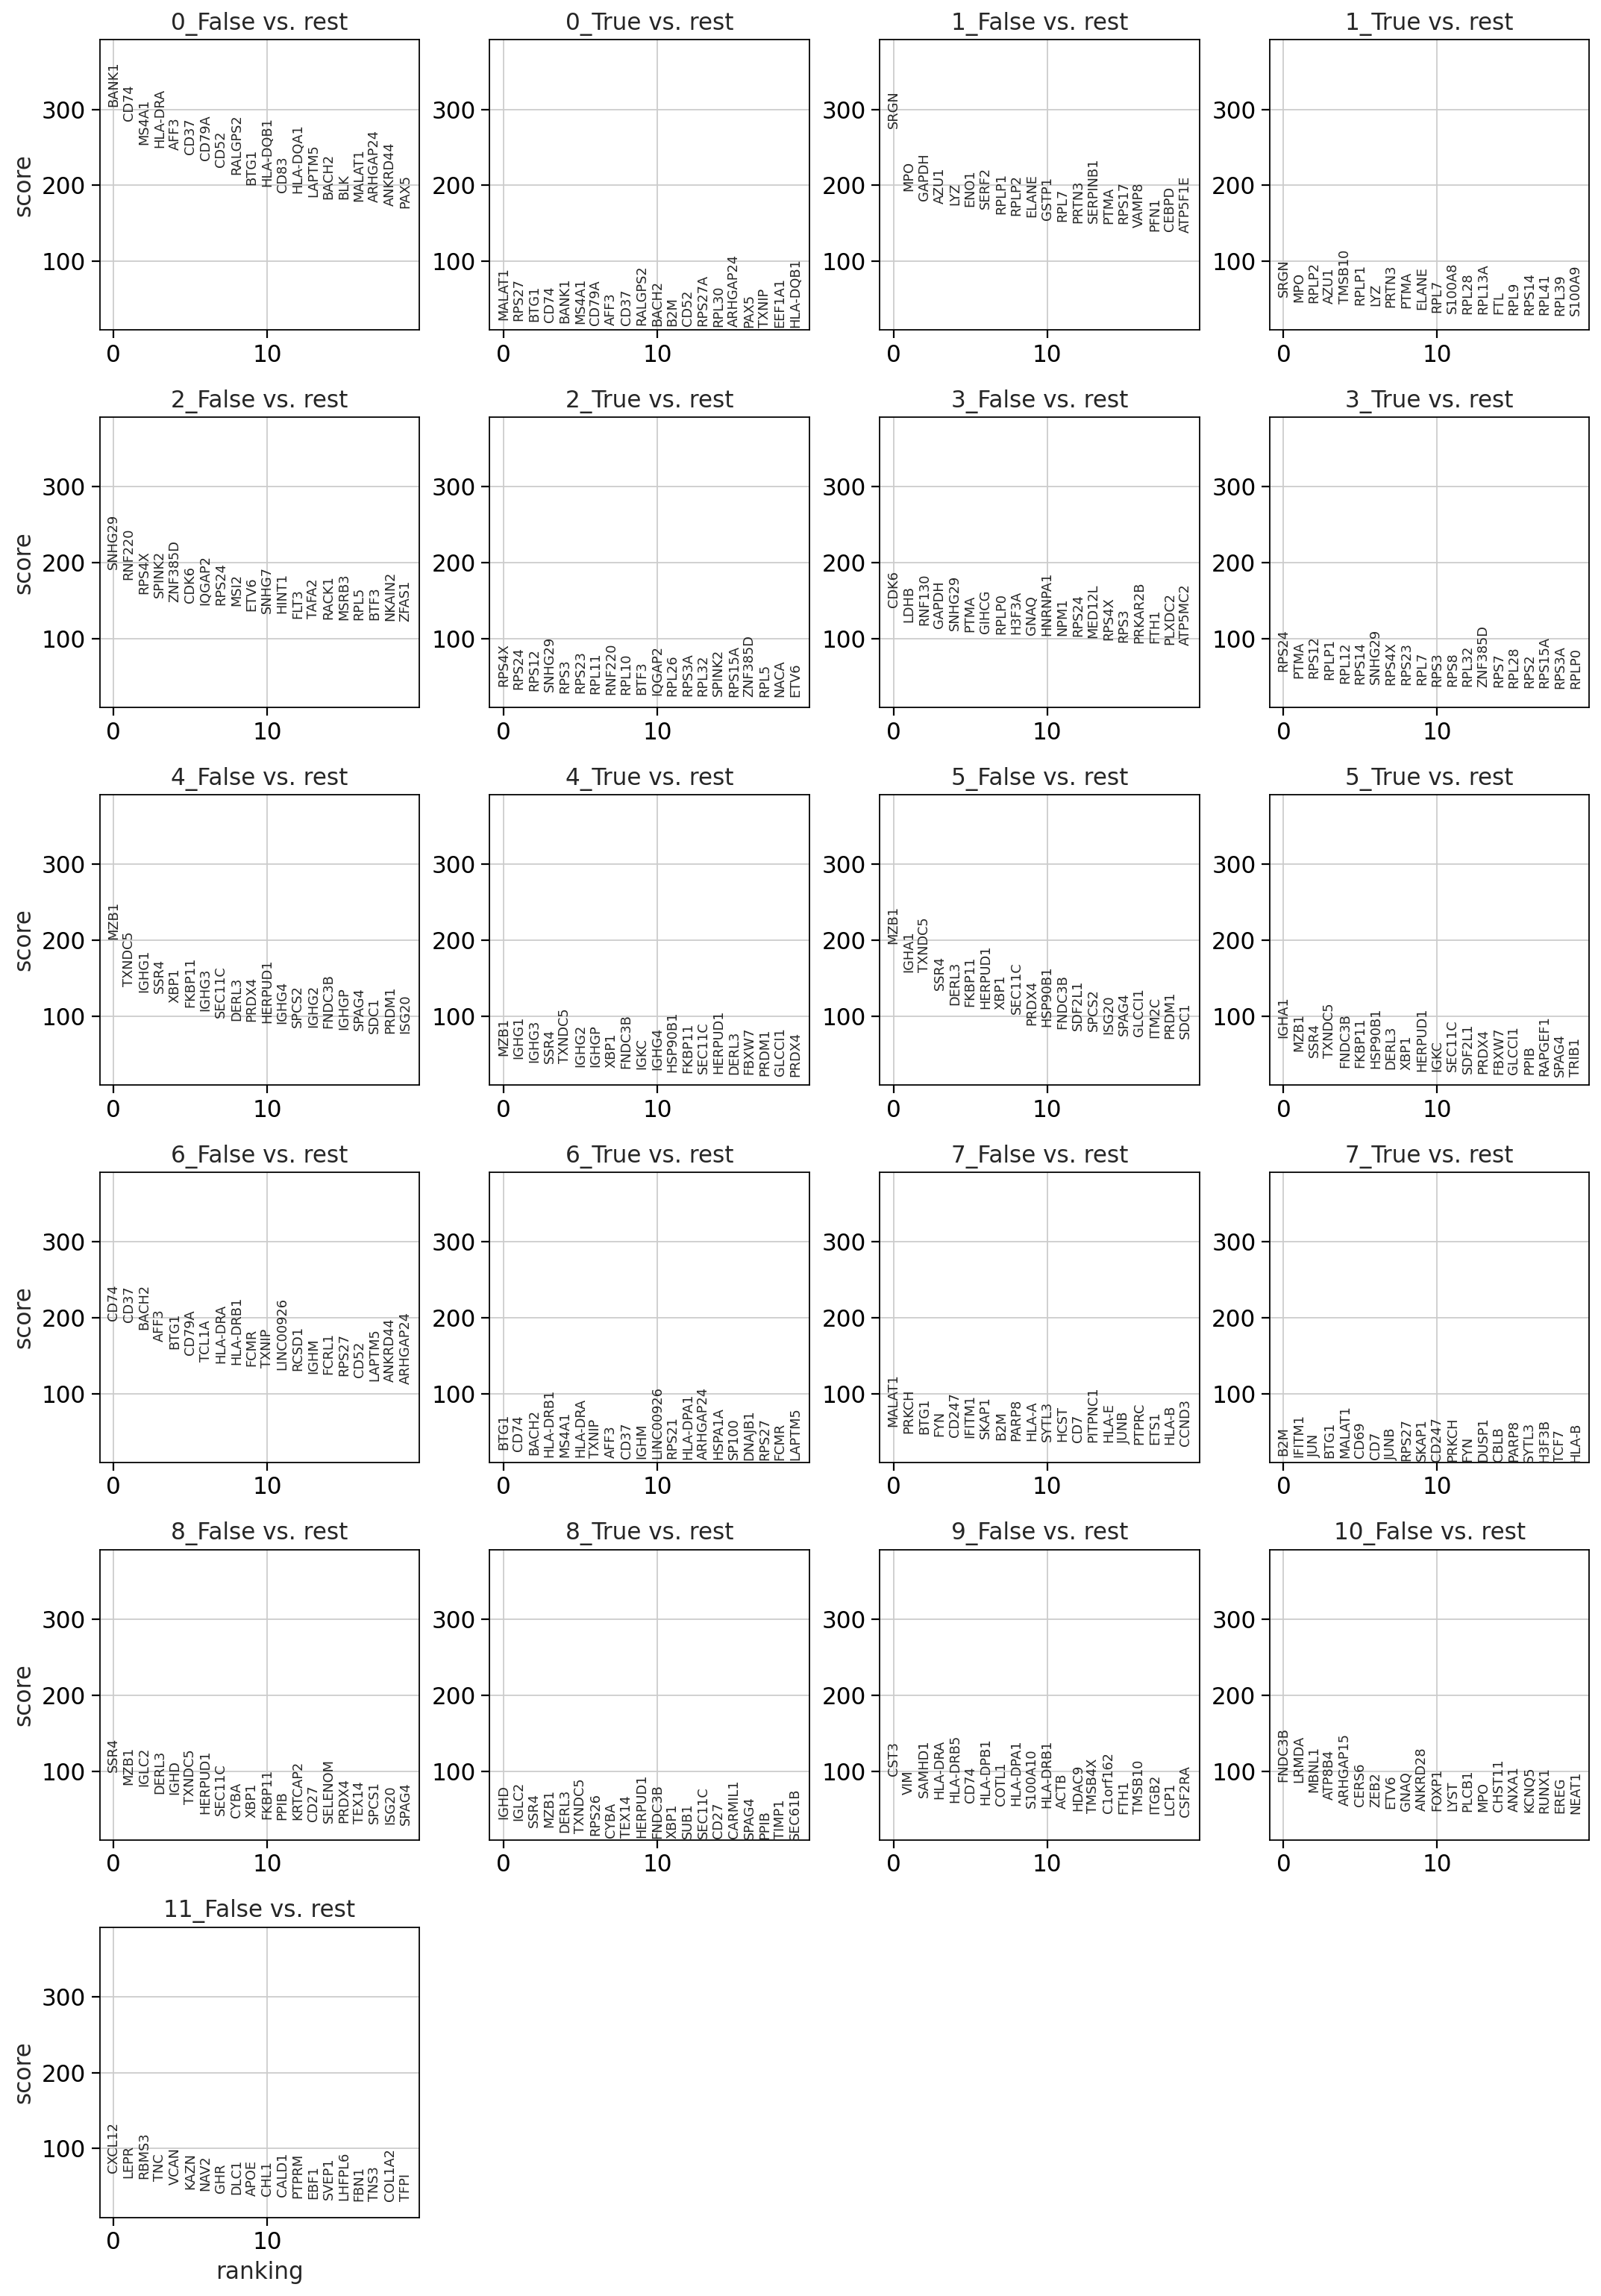

In [51]:
sc.pl.rank_genes_groups(adata)

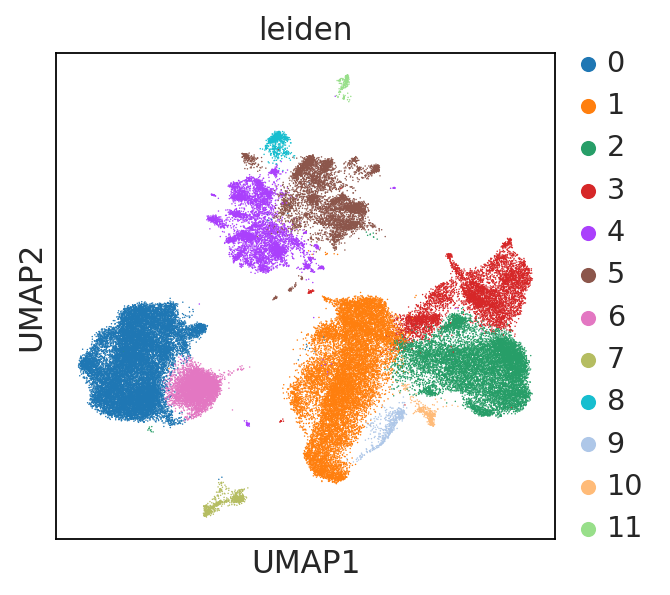

In [70]:
sc.pl.umap(adata, color = 'leiden')

In [79]:
# Low Resolution
predictions = celltypist.annotate(adata, model = 'Immune_All_Low.pkl', majority_voting=True, over_clustering=adata.obs.leiden)
adata = predictions.to_adata(prefix="my_leiden_")

🔬 Input data has 68733 cells and 36601 genes
🔗 Matching reference genes in the model
🧬 6147 features used for prediction
⚖️ Scaling input data
🖋️ Predicting labels
✅ Prediction done!
🗳️ Majority voting the predictions
✅ Majority voting done!


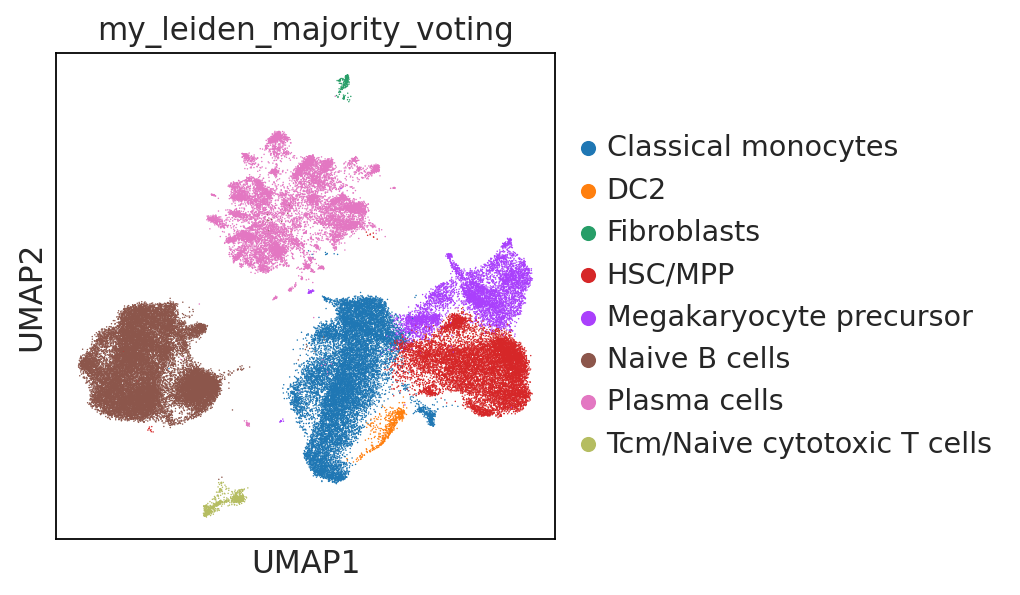

In [80]:
sc.pl.umap(adata, color='my_leiden_majority_voting')

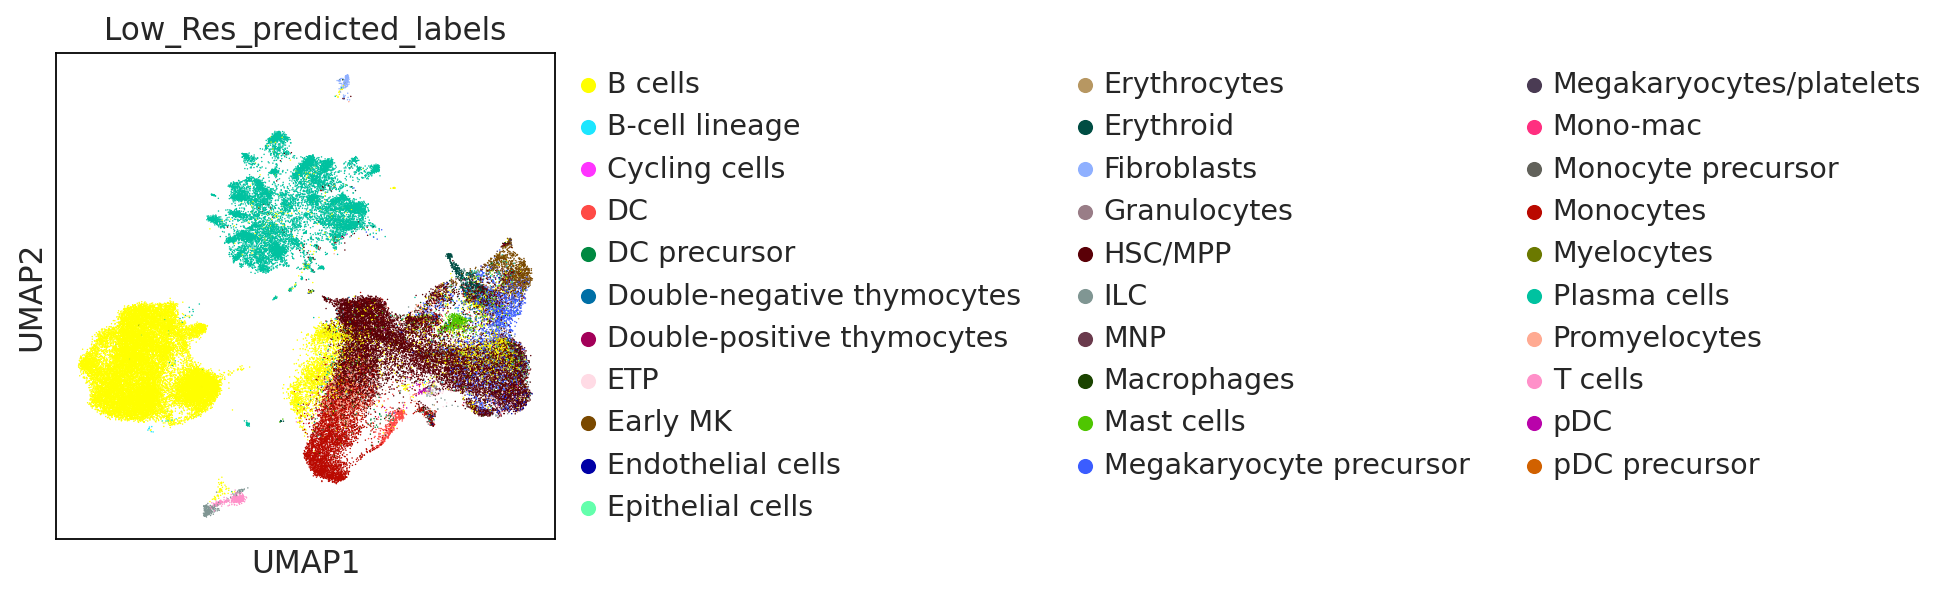

In [68]:
sc.pl.umap(adata, color = 'Low_Res_predicted_labels')

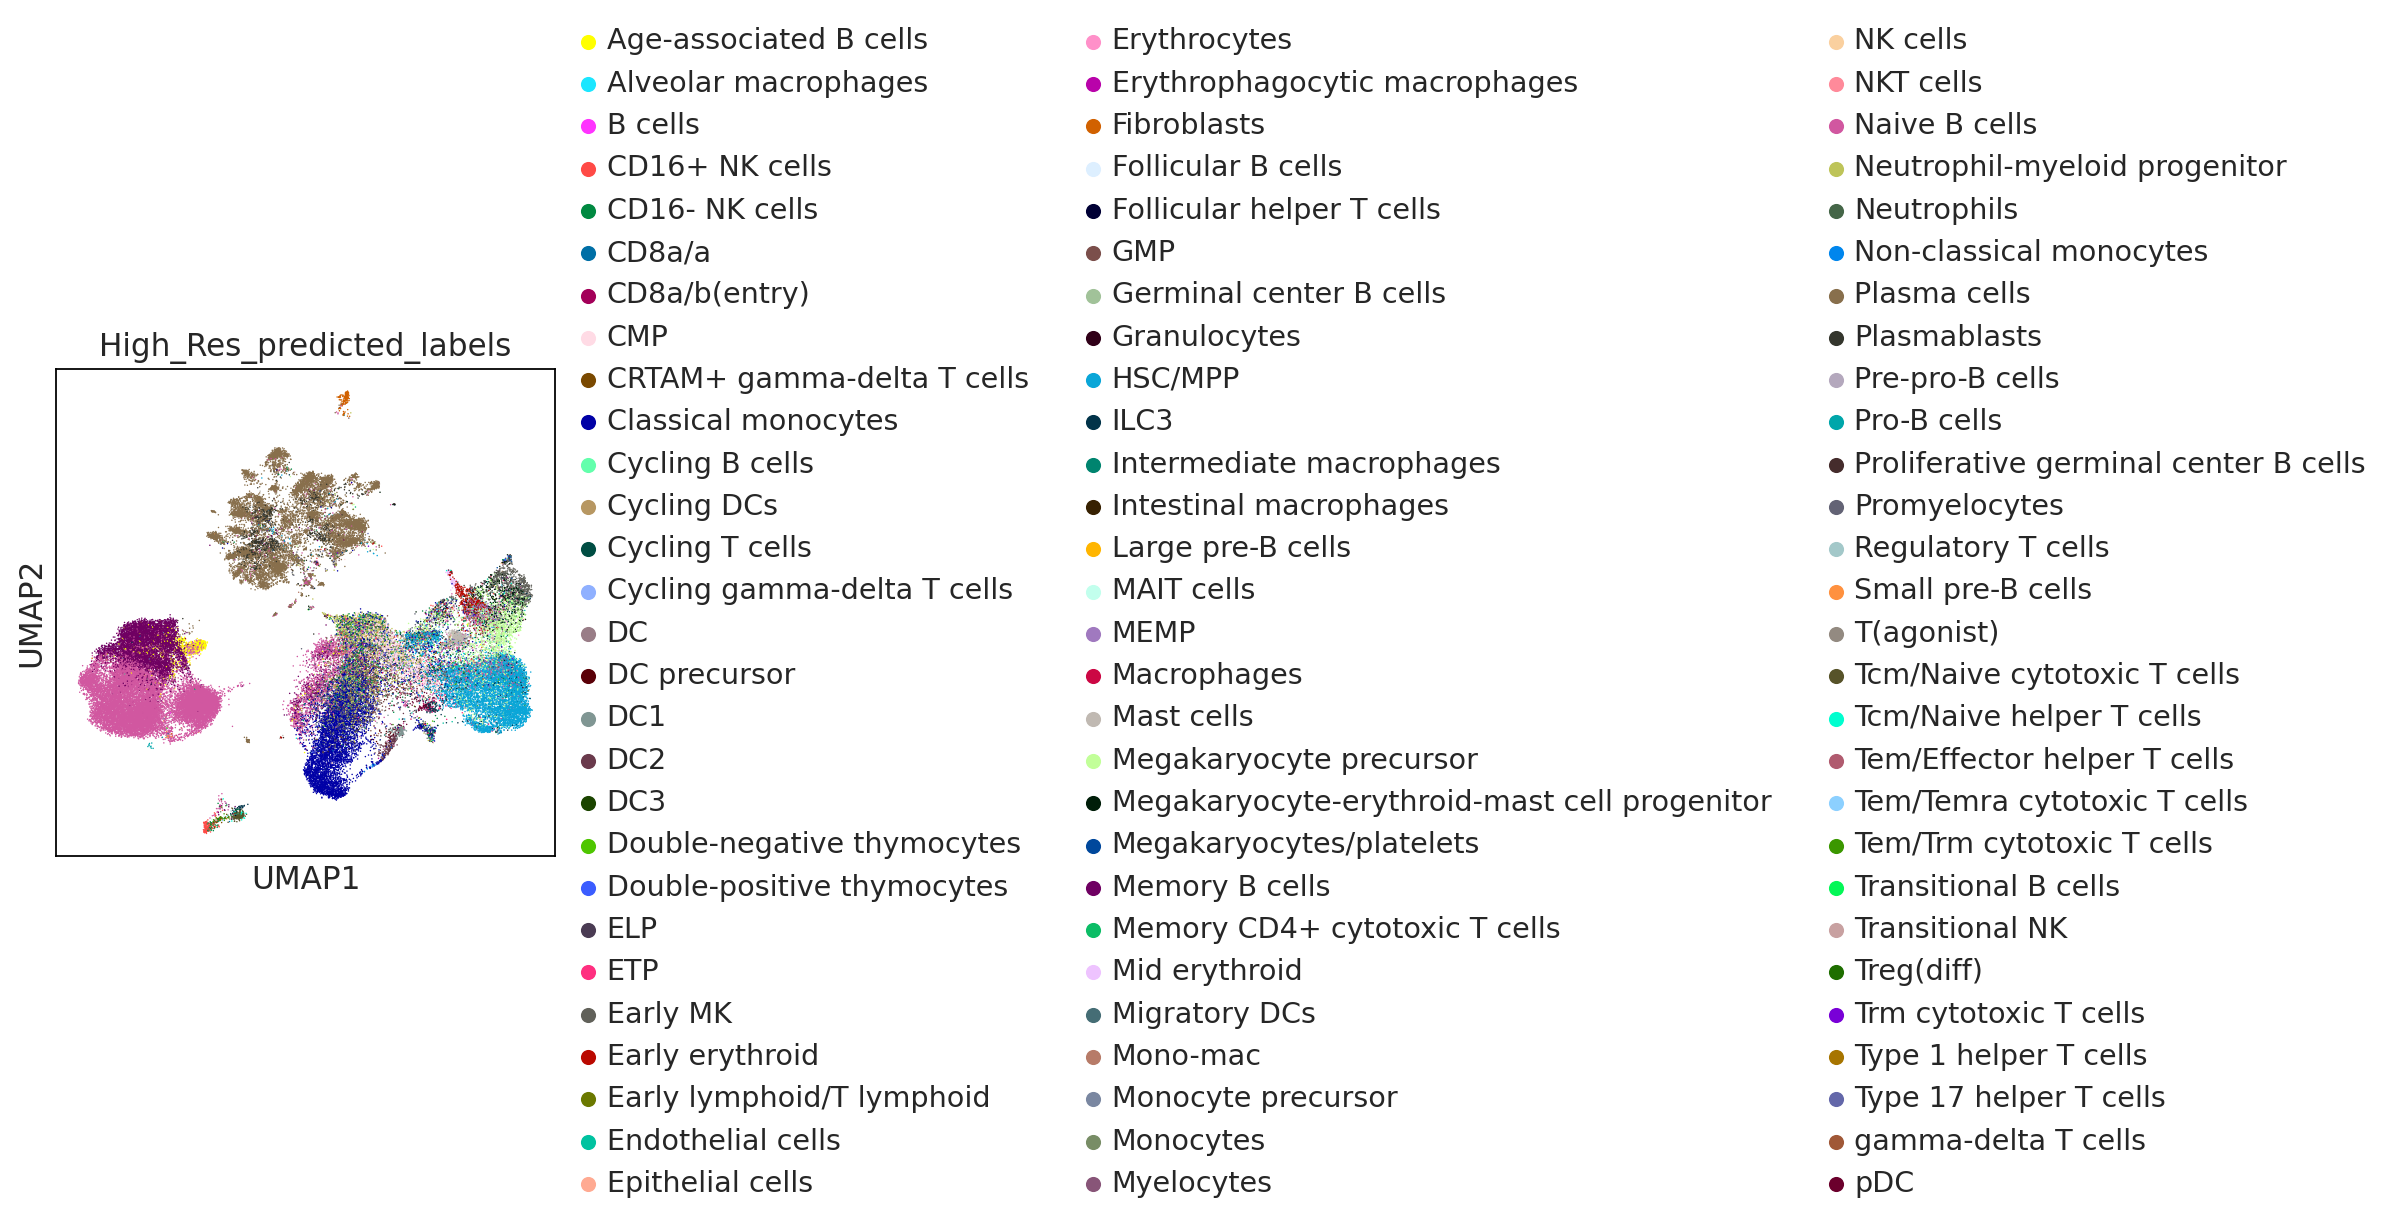

In [69]:
sc.pl.umap(adata, color = 'High_Res_predicted_labels')

AAACCTGAGCCAACAG-1       Plasma cells
AAACCTGAGGACAGCT-1-1          HSC/MPP
AAACCTGAGTCAAGCG-1      Naive B cells
AAACCTGAGTGACATA-1            HSC/MPP
AAACCTGCACCGAAAG-1       Plasma cells
                            ...      
TTTGTCATCTCCAACC-1-1     Plasma cells
TTTGTCATCTCCCTGA-1-2     Plasmablasts
TTTGTCATCTCTGCTG-1-1    Naive B cells
TTTGTCATCTGTTGAG-1-1    Naive B cells
TTTGTCATCTTTACGT-1      Naive B cells
Name: Immune_All_Low_predicted_labels, Length: 68935, dtype: category
Categories (84, object): ['Age-associated B cells', 'Alveolar macrophages', 'B cells', 'CD16+ NK cells', ..., 'Type 1 helper T cells', 'Type 17 helper T cells', 'gamma-delta T cells', 'pDC']

In [ ]:
umap_color_1(adata, column_name='BM_leiden', variable_name="16", size = 20)

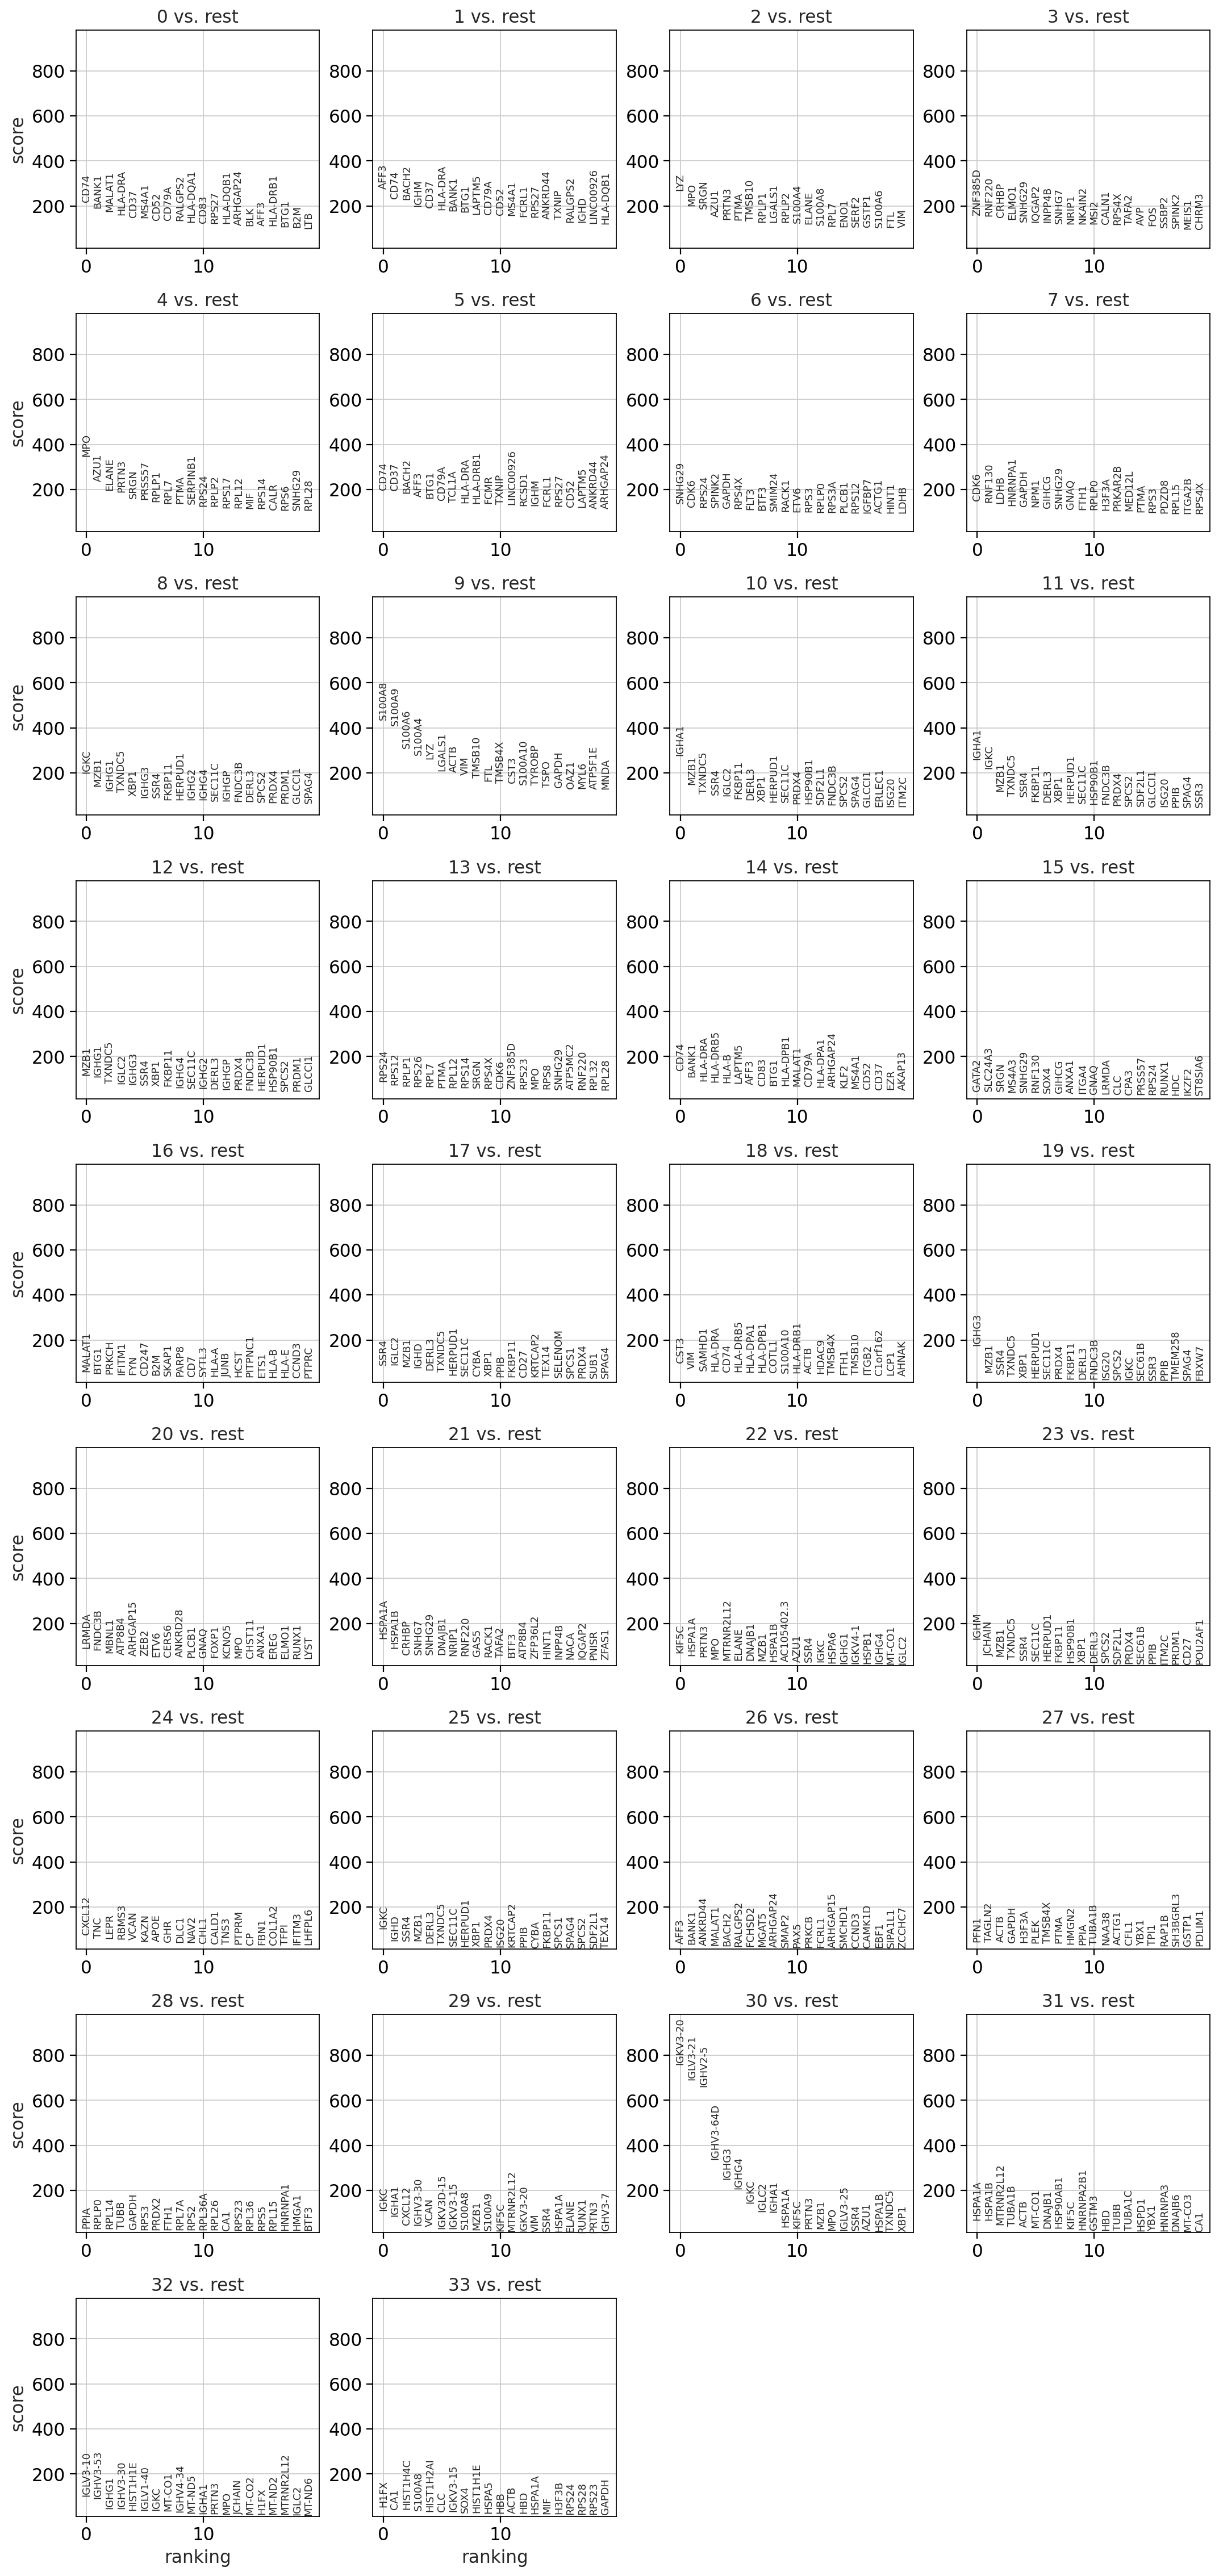

In [ ]:

sc.pl.rank_genes_groups(adata)

In [17]:
sc.tl.leiden(adata, resolution=0.2)

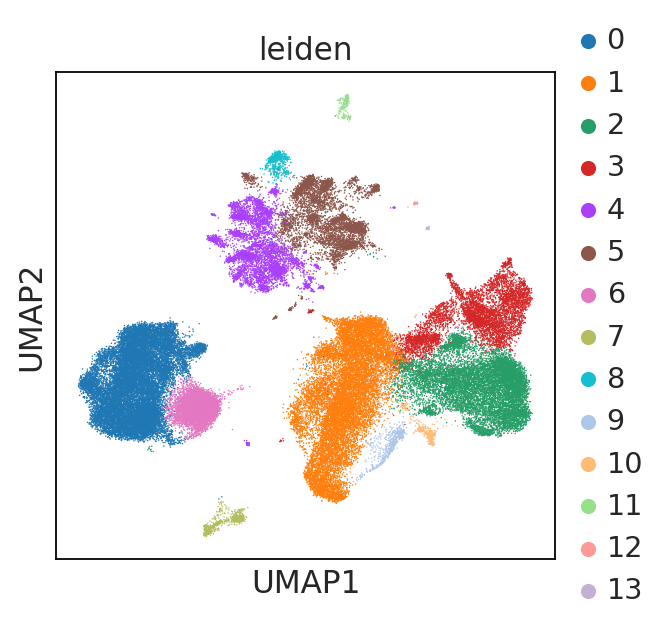

In [18]:
sc.pl.umap(adata, color = 'leiden')

In [19]:
adata

AnnData object with n_obs × n_vars = 68935 × 36601
    obs: 'sample_uid', 'n_genes', 'n_counts', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'Unnamed: 0', 'donor', 'sample_type', 'sample_descriptor', 'tissue', 'sample_index', 'library_uid', 'lib_type', 'expected_cells_thousands', 'resequenced', 'leiden', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'High_Res_predicted_labels', 'High_Res_conf_score', 'Low_Res_predicted_labels', 'Low_Res_conf_score', 'doublet_scores_umi_counts', 'predicted_doublets_umi_counts', 'doublet_scores_background_removed', 'predicted_doublets_background_removed', 'BM_leiden'
    var: 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'highly_variable_nbatches', 'highly_variable_intersection'
    uns: